In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import statsmodels.api as sm


In [3]:
df = pd.read_csv('dados/imoveis_sp.csv')
df.head()


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [5]:
df = df[(df['Price'] > 0) & (df['Size'] > 0)]
df.dropna(subset=['Price', 'Size'], inplace=True)


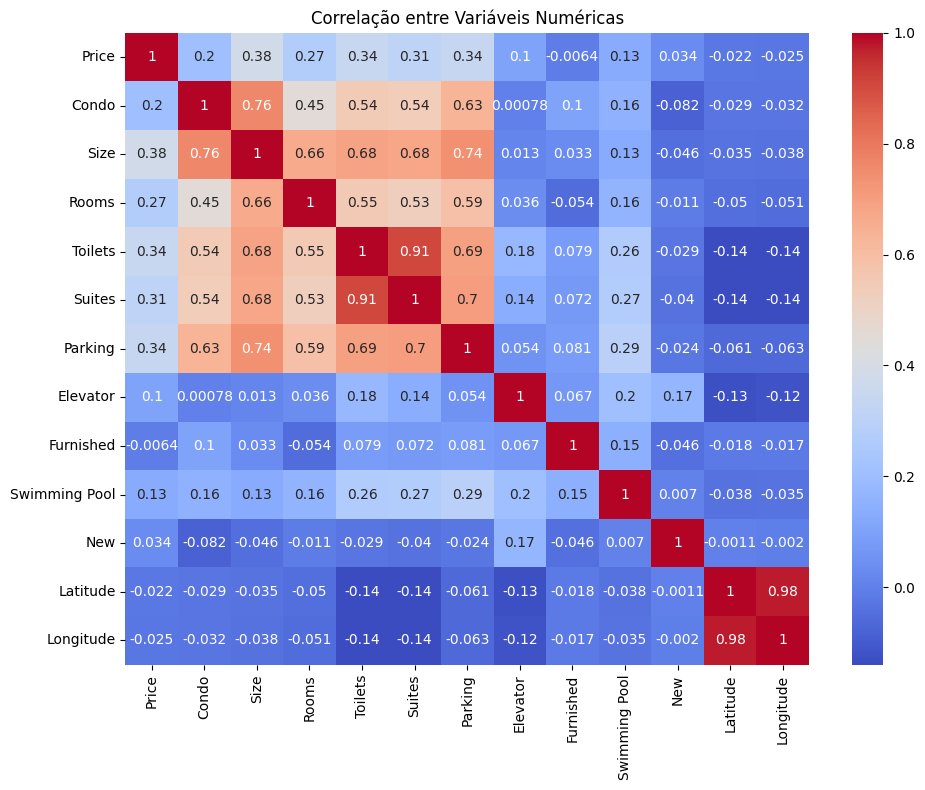

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.savefig('grafico-correlacao.png')  # Para colocar no site depois
plt.show()


In [7]:
import statsmodels.api as sm

# Garantir que os dados estão limpos
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Size', 'Price'], inplace=True)

# Regressão
X = df['Size']
y = df['Price']

X = sm.add_constant(X)  # adiciona o intercepto
modelo = sm.OLS(y, X).fit()
print(modelo.summary())




                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2280.
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        17:28:41   Log-Likelihood:            -1.9957e+05
No. Observations:               13640   AIC:                         3.991e+05
Df Residuals:                   13638   BIC:                         3.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.511e+04   8224.725     -4.269      0.0

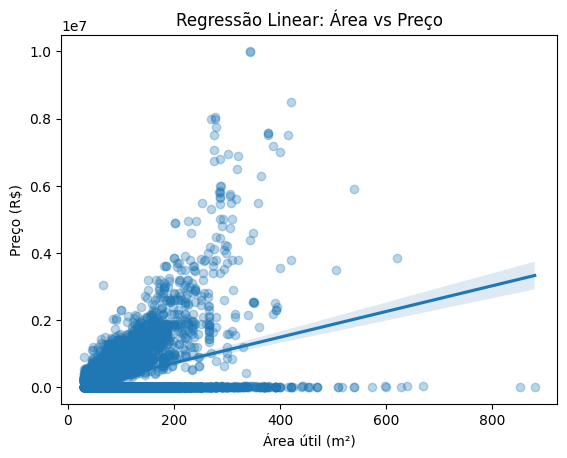

In [8]:
sns.regplot(x='Size', y='Price', data=df, scatter_kws={"alpha":0.3})
plt.title('Regressão Linear: Área vs Preço')
plt.xlabel('Área útil (m²)')
plt.ylabel('Preço (R$)')
plt.savefig('grafico-regressao.png')
plt.show()


In [9]:

variaveis = ['Size', 'Rooms', 'Toilets', 'Suites', 'Parking']

df[variaveis + ['Price']] = df[variaveis + ['Price']].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=variaveis + ['Price'], inplace=True)

X = df[variaveis]
y = df['Price']

X = sm.add_constant(X)

modelo_multiplo = sm.OLS(y, X).fit()

print(modelo_multiplo.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     518.3
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        17:28:43   Log-Likelihood:            -1.9943e+05
No. Observations:               13640   AIC:                         3.989e+05
Df Residuals:                   13634   BIC:                         3.989e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.974e+05   1.81e+04    -10.892      0.0

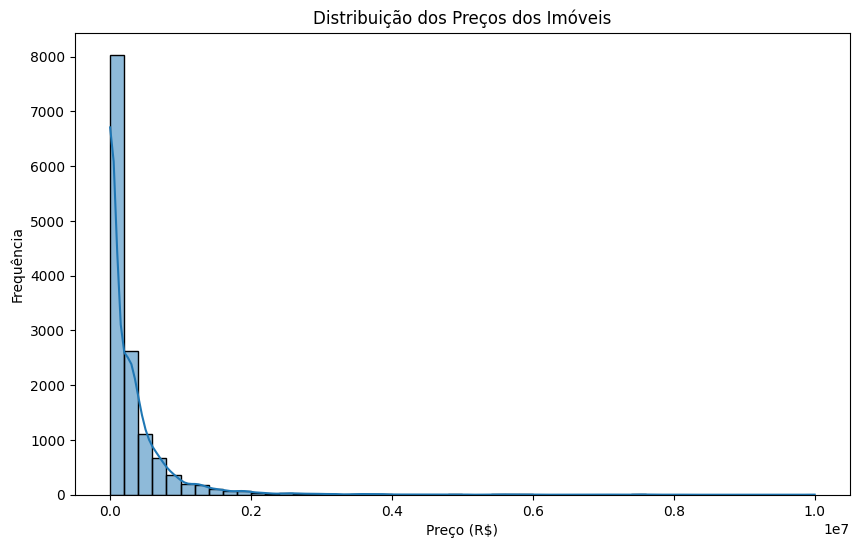

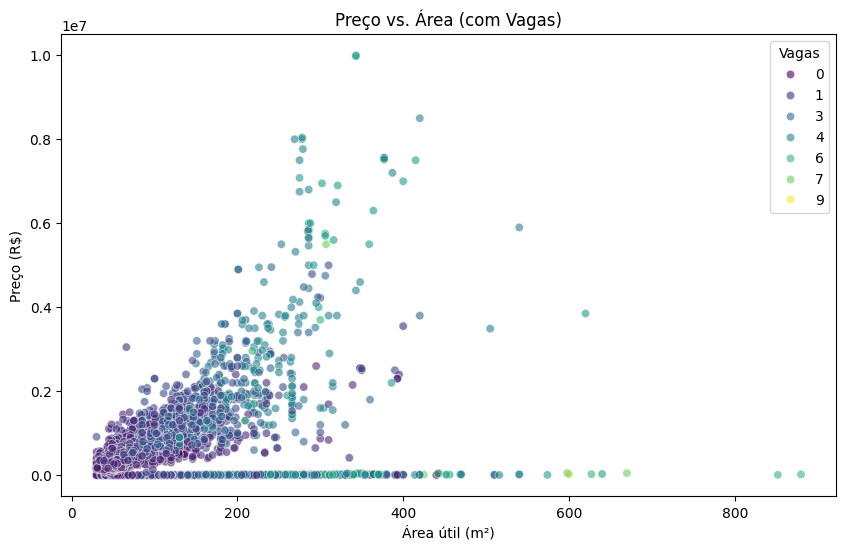

In [10]:
# Gráfico 1 - Distribuição de preços
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.savefig('imagens/distribuicao-precos.png')
plt.show()

# Gráfico 2 - Dispersão por número de vagas
plt.figure(figsize=(10,6))
sns.scatterplot(x='Size', y='Price', hue='Parking', data=df, palette='viridis', alpha=0.6)
plt.title('Preço vs. Área (com Vagas)')
plt.xlabel('Área útil (m²)')
plt.ylabel('Preço (R$)')
plt.legend(title='Vagas')
plt.savefig('imagens/size-vs-price-parking.png')
plt.show()
